<a href="https://colab.research.google.com/github/towardsai/ai-tutor-rag-system/blob/main/notebooks/DallE_3_and_ElevenLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Use DallE-3 to Generate an Image


In [35]:
!pip install -q openai==1.35.13 requests pillow

In [6]:
import os

# Set the "OPENAI_API_KEY" in the Python environment. Will be used by OpenAI client later.
os.environ["OPENAI_API_KEY"] = "[OPENAI_API_KEY]"

In [7]:
from openai import OpenAI

client = OpenAI()

In [10]:
response = client.images.generate(
    model="dall-e-3",
    prompt="A computer scientist wearing a coat implementing a neural network while sitting behind a computer",
    size="1024x1024",
    quality="standard",
    n=1,
)

In [11]:
response

ImagesResponse(created=1721060739, data=[Image(b64_json=None, revised_prompt='A Caucasian male computer scientist, draped in a dark hued coat, diligently constructing a neural network on his computer. He is deeply engrossed with his eyes fixed on the machine, fingers swiftly typing on the keyboard. Enlightening, visual diagrams and intricate coding sequences are displayed on the monitor. The room is imbued with a sense of intellectual fervor, filled with books and scientific models depicting mathematical and computer science principles.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-7B3VYtCFt3BduG3PRIJUl7pf/user-M62aUWaPCn9GB4wAOAGKN8hs/img-w6qAh9SxAPrv7mK395AO9VKz.png?st=2024-07-15T15%3A25%3A39Z&se=2024-07-15T17%3A25%3A39Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-07-15T10%3A31%3A40Z&ske=2024-07-16T10%3A31%3A40Z&sks=b&skv=2023-11-03&sig=RlNygRii2We5Yh3G1mmBV0Q9

In [19]:
from PIL import Image
import requests
from io import BytesIO

# Fetch the image
response = requests.get(response.data[0].url)
response.raise_for_status()  # Check if the request was successful

# Open the image with Pillow
image = Image.open(BytesIO(response.content))

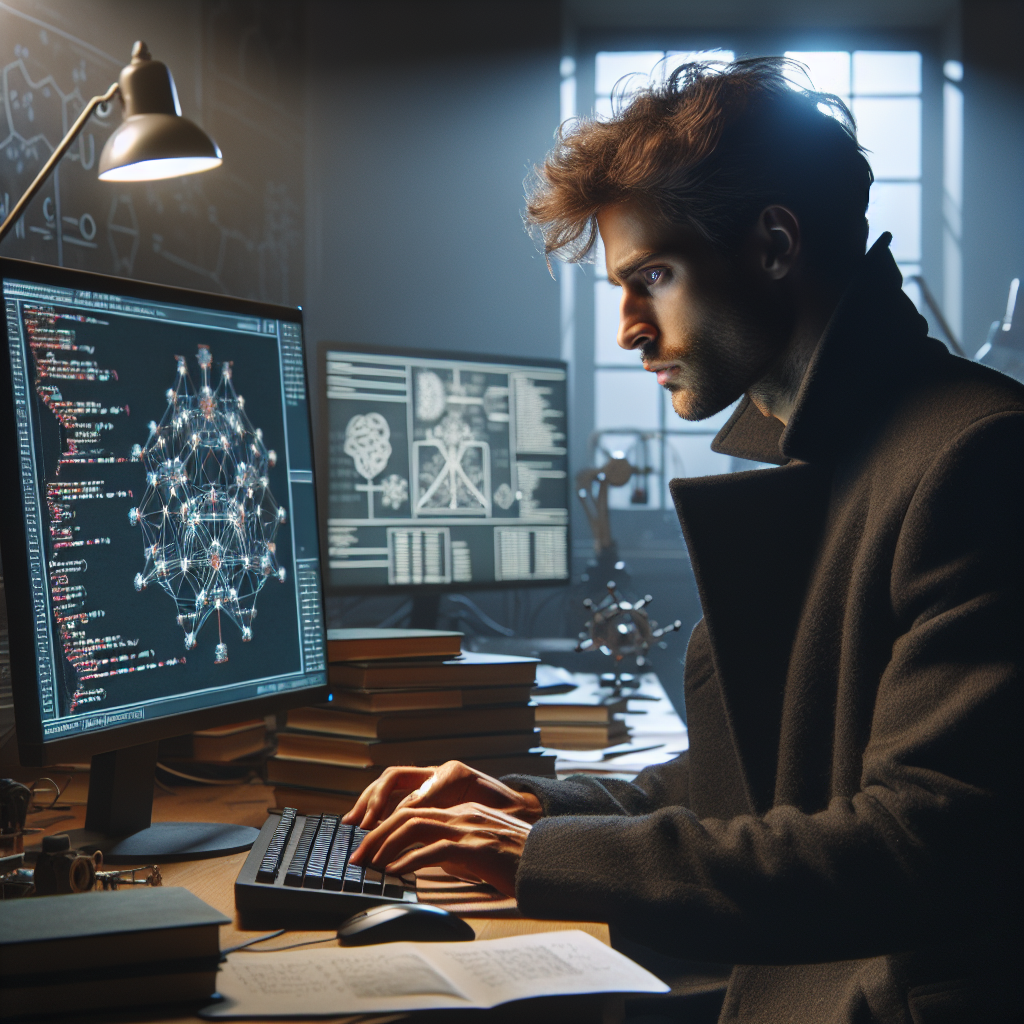

In [21]:
image

# ElevenLabs to Generate Voice


In [22]:
!pip install -q elevenlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.7 MB/s eta 0:00:00


In [25]:
# Set the "ELEVENLABS_API_KEY" as a variable. Will be used by ElevenLabs client later.
ELEVENLABS_API_KEY = "[ELEVENLABS_API_KEY]"

In [27]:
from elevenlabs.client import ElevenLabs

client = ElevenLabs(api_key=ELEVENLABS_API_KEY)

In [28]:
text = "Artificial Intelligence is the future!"

In [29]:
# Calling the text_to_speech conversion API with detailed parameters
response = client.text_to_speech.convert(
    voice_id="pNInz6obpgDQGcFmaJgB",  # Adam pre-made voice
    text=text,
    model_id="eleven_turbo_v2",  # use the turbo model for low latency, for other languages use the `eleven_multilingual_v2`
)

In [32]:
# Generating a unique file name for the output MP3 file
save_file_path = "voice.mp3"

In [33]:
# Writing the audio to a file
with open(save_file_path, "wb") as f:
    for chunk in response:
        if chunk:
            f.write(chunk)

print(f"{save_file_path}: A new audio file was saved successfully!")

voice.mp3: A new audio file was saved successfully!


In [34]:
from IPython.display import Audio, display

display(Audio(save_file_path, autoplay=True))